In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import requests
import json
from scipy import stats

Weather has an effect on Divvy rides

In [48]:
rides_bad_weather = pd.read_pickle('rides_weather_nodrizzle.pickle')

In [151]:
rides_bad_weather.shape

(1125, 3)

In [60]:
rides_bad_weather.head()

,date,num_rides,bad_weather
0,2016-09-01,14435,1.0
1,2016-09-02,16399,0.0
2,2016-09-03,17729,0.0
3,2016-09-04,19744,0.0
4,2016-09-05,17386,0.0


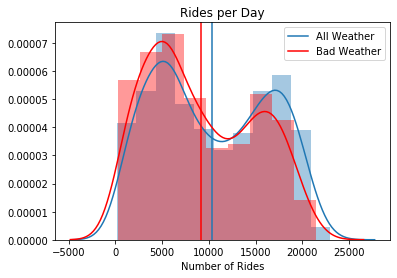

In [194]:
#Bad weather rides
sns.distplot(rides_bad_weather['num_rides'])
plt.axvline(rides_bad_weather['num_rides'].mean())
sns.distplot(rides_bad_weather[rides_bad_weather['bad_weather'] == 1]['num_rides'], color='red')
plt.axvline(rides_bad_weather[rides_bad_weather['bad_weather'] == 1]['num_rides'].mean(), color='red')
plt.title('Rides per Day')
plt.xlabel('Number of Rides')
plt.legend(labels=['All Weather', 'Bad Weather'])

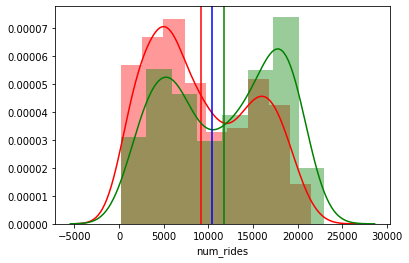

In [141]:
sns.distplot(rides_bad_weather[rides_bad_weather['bad_weather'] == 1]['num_rides'], color='red')
plt.axvline(rides_bad_weather[rides_bad_weather['bad_weather'] == 1]['num_rides'].mean(), color='red')
sns.distplot(rides_bad_weather[rides_bad_weather['bad_weather'] == 0]['num_rides'], color='green')
plt.axvline(rides_bad_weather[rides_bad_weather['bad_weather'] == 0]['num_rides'].mean(), color='green')
plt.axvline(rides_bad_weather['num_rides'].mean(), color='blue');

In [49]:
rides_bad_weather.describe()

,num_rides,bad_weather
count,1125.000000,1125.000000
mean,10372.192889,0.528889
std,6097.681348,0.499387
min,165.000000,0.000000
25%,5043.000000,0.000000
50%,9510.000000,1.000000
75%,16166.000000,1.000000
max,23002.000000,1.000000


In [50]:
rides_bad_weather['bad_weather'].sum()

595.0

In [53]:
#sampmean
rides_bad_weather['num_rides'].groupby(rides_bad_weather['bad_weather']).mean()

bad_weather
0.0    11741.337736
1.0     9152.618487
Name: num_rides, dtype: float64

In [100]:
from math import sqrt

x_bar = 9152.618487
n = 595
sigma = 6097.681347817574
mu = 10372.192888888889

z = (x_bar - mu)/(sigma/sqrt(n))
z

-4.878676908221245

In [101]:
stats.norm.cdf(z)

5.339992296507048e-07

In [102]:
pval = 1 - stats.norm.cdf(z)
pval

0.9999994660007704

In [58]:
mem_rides_weather = pd.read_pickle('mem_rides_weather.pickle')

In [150]:
mem_rides_weather.shape

(2274, 4)

In [59]:
mem_rides_weather.describe()

,num_rides,bad_weather
count,2274.000000,2274.000000
mean,5131.361917,0.526385
std,4665.971763,0.499413
min,1.000000,0.000000
25%,960.000000,0.000000
50%,3832.000000,1.000000
75%,8266.250000,1.000000
max,16243.000000,1.000000


In [74]:
#customer_mean
mem_rides_weather[mem_rides_weather['bad_weather'] == 1].groupby([mem_rides_weather['user_type']]).mean()

,num_rides,bad_weather
user_type,,
Customer,1824.537815,1.0
Dependent,1.285714,1.0
Subscriber,7328.065546,1.0


In [75]:
mem_rides_weather[mem_rides_weather['bad_weather'] == 0].groupby([mem_rides_weather['user_type']]).mean()

,num_rides,bad_weather
user_type,,
Customer,2697.615094,0.0
Dependent,1.352941,0.0
Subscriber,9043.679245,0.0


In [78]:
user_type_rides = mem_rides_weather.groupby(['user_type', 'bad_weather']).agg({'num_rides':'mean'}).reset_index()

In [79]:
user_type_rides

,user_type,bad_weather,num_rides
0,Customer,0.0,2697.615094
1,Customer,1.0,1824.537815
2,Dependent,0.0,1.352941
3,Dependent,1.0,1.285714
4,Subscriber,0.0,9043.679245
5,Subscriber,1.0,7328.065546


In [86]:
bad_weather_df = mem_rides_weather[mem_rides_weather['bad_weather'] == 1]

In [114]:
bad_weather_df.head()

,date,user_type,num_rides,bad_weather
0,2016-09-01,Customer,1841,1.0
1,2016-09-01,Subscriber,12594,1.0
12,2016-09-07,Customer,1712,1.0
13,2016-09-07,Subscriber,11837,1.0
14,2016-09-08,Customer,1683,1.0


In [91]:
bad_customers = bad_weather_df[bad_weather_df['user_type'] == 'Customer']

In [93]:
bad_subs = bad_weather_df[bad_weather_df['user_type'] == 'Subscriber']

In [81]:
good_weather_df = mem_rides_weather[mem_rides_weather['bad_weather'] == 0]

In [94]:
good_customers = good_weather_df[good_weather_df['user_type'] == 'Customer']

In [96]:
good_subs = good_weather_df[good_weather_df['user_type'] == 'Subscriber']

In [117]:
bad_subs.describe()

,num_rides,bad_weather
count,595.000000,595.0
mean,7328.065546,1.0
std,4181.776376,0.0
min,226.000000,1.0
25%,4270.000000,1.0
50%,6483.000000,1.0
75%,10452.000000,1.0
max,15953.000000,1.0


In [121]:
bad_customers.describe()

,num_rides,bad_weather
count,595.000000,595.0
mean,1824.537815,1.0
std,2335.725751,0.0
min,2.000000,1.0
25%,132.000000,1.0
50%,760.000000,1.0
75%,2766.500000,1.0
max,11253.000000,1.0


In [87]:
from statsmodels.formula.api import ols
import statsmodels.api as sm

In [143]:
mem_rides_weather.head()

,date,user_type,num_rides,bad_weather
0,2016-09-01,Customer,1841,1.0
1,2016-09-01,Subscriber,12594,1.0
2,2016-09-02,Customer,4176,0.0
3,2016-09-02,Subscriber,12223,0.0
4,2016-09-03,Customer,10190,0.0


In [145]:
mem_rides_weather[mem_rides_weather['user_type']== 'Customer']['num_rides'].mean()

2235.8542222222222

In [147]:
bad_customers['num_rides'].mean()

1824.5378151260504

In [146]:
mem_rides_weather[mem_rides_weather['user_type']== 'Subscriber']['num_rides'].mean()

8136.310222222222

In [148]:
bad_subs['num_rides'].mean()

7328.065546218488

In [166]:
bad_customers.head()

,date,user_type,num_rides,bad_weather
0,2016-09-01,Customer,1841,1.0
12,2016-09-07,Customer,1712,1.0
14,2016-09-08,Customer,1683,1.0
16,2016-09-09,Customer,2207,1.0
18,2016-09-10,Customer,4606,1.0


In [167]:
bad = bad_customers['num_rides']
good = good_customers['num_rides']

ttest_ind(good, bad)

Ttest_indResult(statistic=34.51752251184858, pvalue=1.4800660668298033e-178)

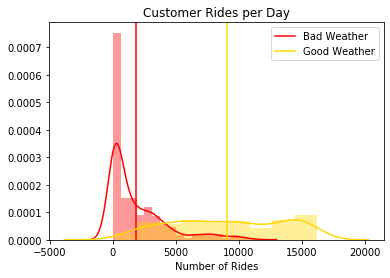

In [198]:
#Customers vs Weather
sns.distplot(bad, color='red')
plt.axvline(bad.mean(),color='red')
sns.distplot(good, color='gold')
plt.axvline(good.mean(), color='gold')
plt.title('Customer Rides per Day')
plt.xlabel('Number of Rides')
plt.legend(labels=['Bad Weather', 'Good Weather'])

In [169]:
bad2 = bad_subs['num_rides']
good2 = good_subs['num_rides']

ttest_ind(good2, bad2)

Ttest_indResult(statistic=6.655630886951399, pvalue=4.401206767023926e-11)

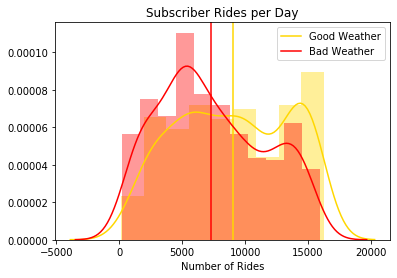

In [199]:
#Subs vs Weather
sns.distplot(good2, color='gold')
plt.axvline(good2.mean(), color='gold')
sns.distplot(bad2, color='red')
plt.axvline(bad2.mean(),color='red')
plt.title('Subscriber Rides per Day')
plt.xlabel('Number of Rides')
plt.legend(labels=['Good Weather', 'Bad Weather'])